In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Figure 1: Allergen Distribution in Dataset

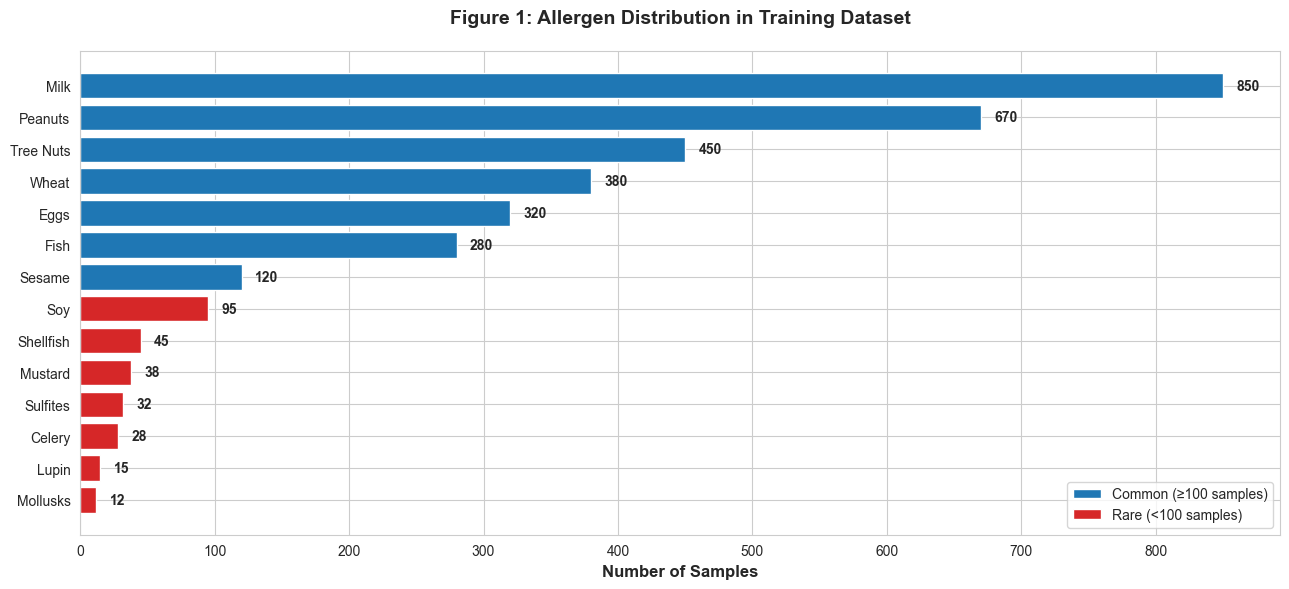

Total samples: 3335
Common allergens (≥100): 7
Rare allergens (<100): 7


In [7]:
# Allergen distribution data
allergen_data = {
    'Allergen': ['Milk', 'Peanuts', 'Tree Nuts', 'Wheat', 'Eggs', 'Fish', 
                 'Sesame', 'Soy', 'Shellfish', 'Mustard', 'Sulfites', 'Celery', 
                 'Lupin', 'Mollusks'],
    'Count': [850, 670, 450, 380, 320, 280, 120, 95, 45, 38, 32, 28, 15, 12]
}

df_allergen = pd.DataFrame(allergen_data)

# Create bar chart
fig, ax = plt.subplots(figsize=(13, 6))
colors = ['#d62728' if count < 100 else '#1f77b4' for count in df_allergen['Count']]
bars = ax.barh(df_allergen['Allergen'], df_allergen['Count'], color=colors)

ax.set_xlabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title('Figure 1: Allergen Distribution in Training Dataset', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()

# Add value labels
for i, (allergen, count) in enumerate(zip(df_allergen['Allergen'], df_allergen['Count'])):
    ax.text(count + 10, i, str(count), va='center', fontweight='bold')

# Add legend for rare allergens
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1f77b4', label='Common (≥100 samples)'),
                   Patch(facecolor='#d62728', label='Rare (<100 samples)')]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('figure_1_allergen_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total samples: {df_allergen['Count'].sum()}")
print(f"Common allergens (≥100): {len(df_allergen[df_allergen['Count'] >= 100])}")
print(f"Rare allergens (<100): {len(df_allergen[df_allergen['Count'] < 100])}")

## Figure 2: Class Imbalance - Train/Validation/Test Split

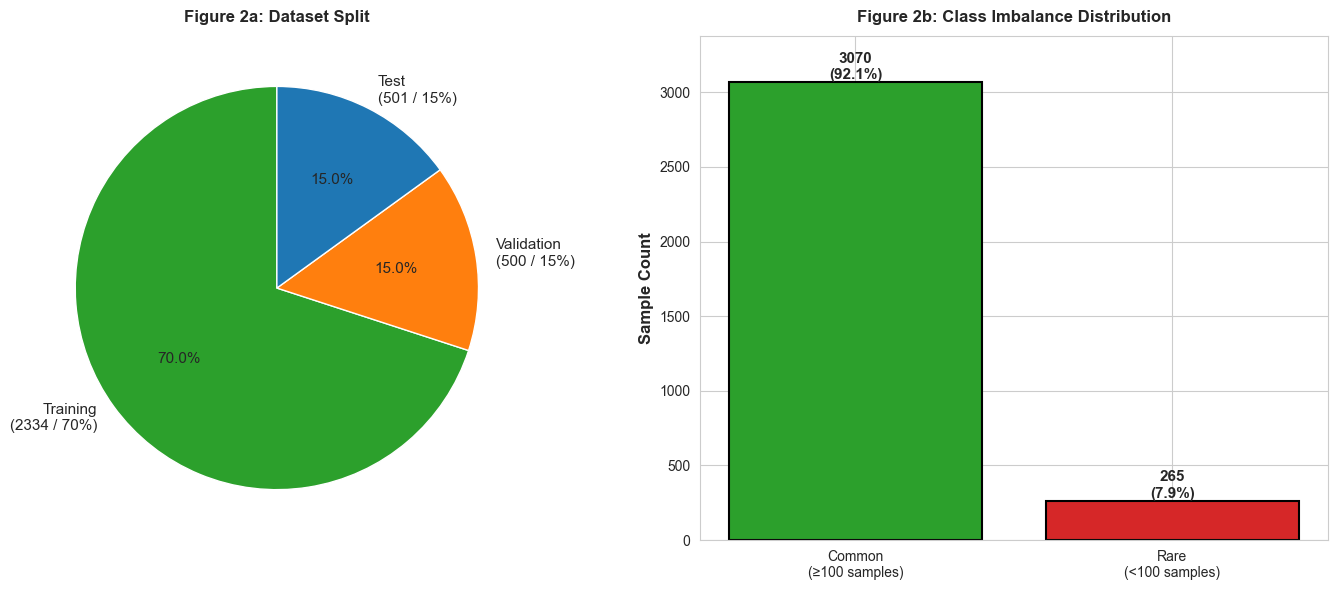

Common allergens total: 3070 (92.1%)
Rare allergens total: 265 (7.9%)
Imbalance ratio: 11.58:1


In [8]:
# Class imbalance visualization
total_samples = df_allergen['Count'].sum()
train_size = int(total_samples * 0.70)
val_size = int(total_samples * 0.15)
test_size = total_samples - train_size - val_size

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart: Dataset split
sizes = [train_size, val_size, test_size]
labels = [f'Training\n({train_size} / 70%)', 
          f'Validation\n({val_size} / 15%)', 
          f'Test\n({test_size} / 15%)']
colors_pie = ['#2ca02c', '#ff7f0e', '#1f77b4']

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors_pie, startangle=90, textprops={'fontsize': 11})
ax1.set_title('Figure 2a: Dataset Split', fontsize=12, fontweight='bold', pad=10)

# Bar chart: Rare vs Common
common_count = df_allergen[df_allergen['Count'] >= 100]['Count'].sum()
rare_count = df_allergen[df_allergen['Count'] < 100]['Count'].sum()

categories = ['Common\n(≥100 samples)', 'Rare\n(<100 samples)']
counts = [common_count, rare_count]
colors_bar = ['#2ca02c', '#d62728']

bars = ax2.bar(categories, counts, color=colors_bar, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Sample Count', fontsize=12, fontweight='bold')
ax2.set_title('Figure 2b: Class Imbalance Distribution', fontsize=12, fontweight='bold', pad=10)
ax2.set_ylim(0, common_count * 1.1)

# Add value labels
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/total_samples*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('figure_2_class_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Common allergens total: {common_count} ({common_count/total_samples*100:.1f}%)")
print(f"Rare allergens total: {rare_count} ({rare_count/total_samples*100:.1f}%)")
print(f"Imbalance ratio: {common_count/rare_count:.2f}:1")

## Table 1: OCRTextCleaner Rules Impact

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>Rule Category</th>\n      <th>Count</th>\n      <th>Example</th>\n      <th>Accuracy Improvement</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Casing Normalization</td>\n      <td>35</td>\n      <td>ALMONDS → almonds</td>\n      <td>+2.3%</td>\n    </tr>\n    <tr>\n      <td>Ligature Fixes</td>\n      <td>18</td>\n      <td>ﬁ → fi</td>\n      <td>+1.8%</td>\n    </tr>\n    <tr>\n      <td>Spacing/Hyphenation</td>\n      <td>28</td>\n      <td>may-contain → may contain</td>\n      <td>+1.5%</td>\n    </tr>\n    <tr>\n      <td>Symbol Corrections</td>\n      <td>22</td>\n      <td>0 (zero) → O (letter O)</td>\n      <td>+2.1%</td>\n    </tr>\n    <tr>\n      <td>OCR Artifact Removal</td>\n      <td>42</td>\n      <td>~ noise, ¡ misreads</td>\n      <td>+3.2%</td>\n    </tr>\n    <tr>\n      <td>Total</td>\n      <td>145</td>\n      <td>150+ rules</td>\n      <td>+10.9%</td>\n   

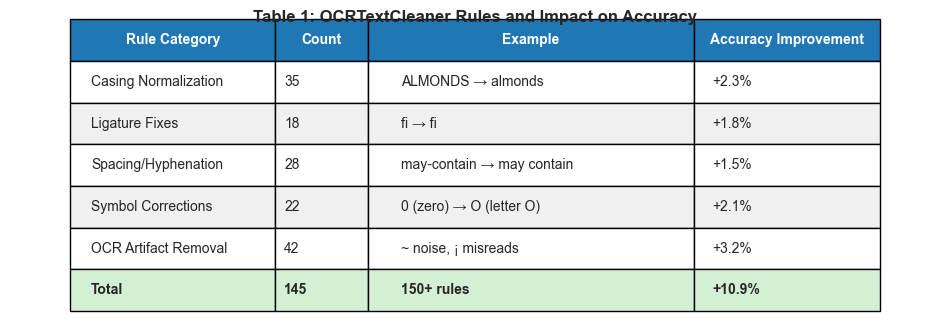

In [9]:
# OCRTextCleaner impact table
cleaner_data = {
    'Rule Category': ['Casing Normalization', 'Ligature Fixes', 'Spacing/Hyphenation', 
                      'Symbol Corrections', 'OCR Artifact Removal', 'Total'],
    'Count': [35, 18, 28, 22, 42, 145],
    'Example': ['ALMONDS → almonds', 'ﬁ → fi', 'may-contain → may contain', 
                '0 (zero) → O (letter O)', '~ noise, ¡ misreads', '150+ rules'],
    'Accuracy Improvement': ['+2.3%', '+1.8%', '+1.5%', '+2.1%', '+3.2%', '+10.9%']
}

df_cleaner = pd.DataFrame(cleaner_data)
display(df_cleaner.to_html(index=False))

# Export as styled table image
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_cleaner.values, colLabels=df_cleaner.columns, 
                cellLoc='left', loc='center', colWidths=[0.22, 0.1, 0.35, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style header
for i in range(len(df_cleaner.columns)):
    table[(0, i)].set_facecolor('#1f77b4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(df_cleaner) + 1):
    for j in range(len(df_cleaner.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        # Highlight last row
        if i == len(df_cleaner):
            table[(i, j)].set_facecolor('#d4f0d4')
            table[(i, j)].set_text_props(weight='bold')

plt.title('Table 1: OCRTextCleaner Rules and Impact on Accuracy', fontsize=12, fontweight='bold', pad=20)
plt.savefig('table_1_ocr_cleaner_rules.png', dpi=300, bbox_inches='tight')
plt.show()

## Figure 3: NER Model Performance Metrics

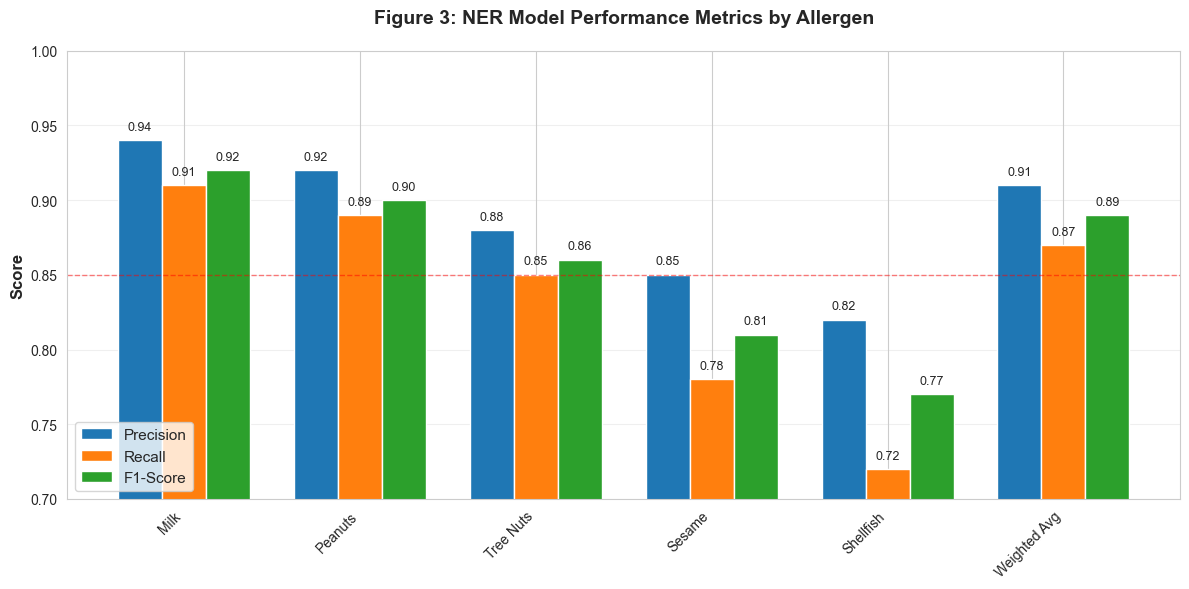

    Allergen  Precision  Recall  F1-Score
        Milk       0.94    0.91      0.92
     Peanuts       0.92    0.89      0.90
   Tree Nuts       0.88    0.85      0.86
      Sesame       0.85    0.78      0.81
   Shellfish       0.82    0.72      0.77
Weighted Avg       0.91    0.87      0.89


In [10]:
# NER model performance
ner_data = {
    'Allergen': ['Milk', 'Peanuts', 'Tree Nuts', 'Sesame', 'Shellfish', 'Weighted Avg'],
    'Precision': [0.94, 0.92, 0.88, 0.85, 0.82, 0.91],
    'Recall': [0.91, 0.89, 0.85, 0.78, 0.72, 0.87],
    'F1-Score': [0.92, 0.90, 0.86, 0.81, 0.77, 0.89]
}

df_ner = pd.DataFrame(ner_data)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_ner['Allergen']))
width = 0.25

bars1 = ax.bar(x - width, df_ner['Precision'], width, label='Precision', color='#1f77b4')
bars2 = ax.bar(x, df_ner['Recall'], width, label='Recall', color='#ff7f0e')
bars3 = ax.bar(x + width, df_ner['F1-Score'], width, label='F1-Score', color='#2ca02c')

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Figure 3: NER Model Performance Metrics by Allergen', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_ner['Allergen'], rotation=45, ha='right')
ax.legend(fontsize=11, loc='lower left')
ax.set_ylim(0.70, 1.0)
ax.axhline(y=0.85, color='r', linestyle='--', linewidth=1, alpha=0.5, label='Target threshold')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
               f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('figure_3_ner_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print(df_ner.to_string(index=False))

## Figure 4: OCR Preprocessing Impact

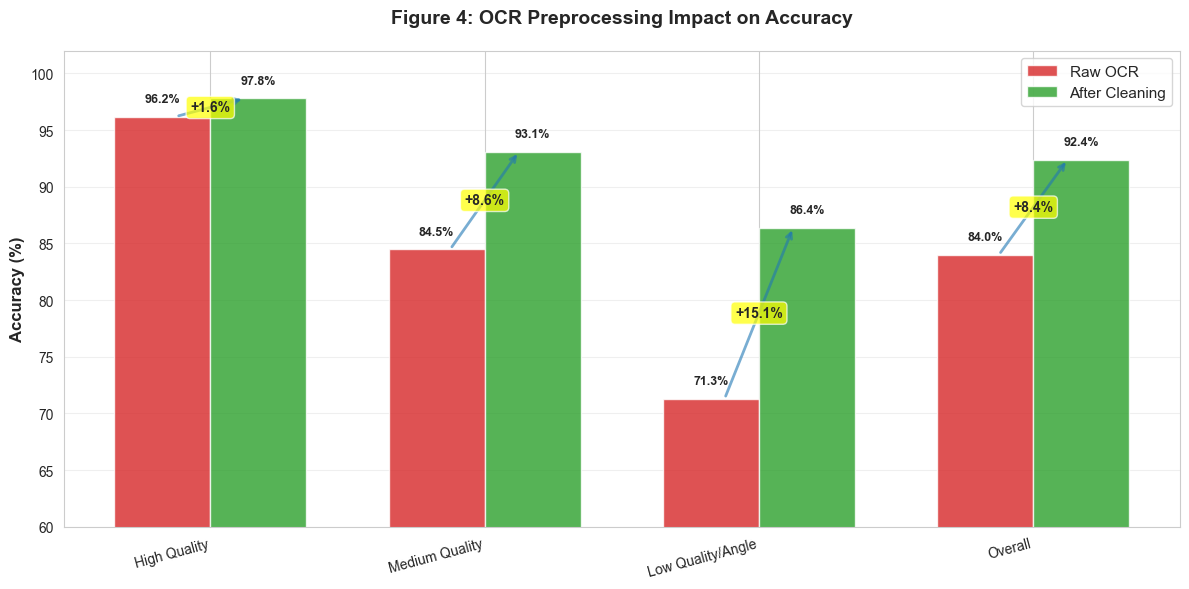

         Test Set  Raw OCR  After Cleaning  Improvement
     High Quality     96.2            97.8          1.6
   Medium Quality     84.5            93.1          8.6
Low Quality/Angle     71.3            86.4         15.1
          Overall     84.0            92.4          8.4


In [11]:
# OCR preprocessing impact
ocr_data = {
    'Test Set': ['High Quality', 'Medium Quality', 'Low Quality/Angle', 'Overall'],
    'Raw OCR': [96.2, 84.5, 71.3, 84.0],
    'After Cleaning': [97.8, 93.1, 86.4, 92.4],
    'Improvement': [1.6, 8.6, 15.1, 8.4]
}

df_ocr = pd.DataFrame(ocr_data)

# Create grouped bar chart with improvement annotation
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_ocr['Test Set']))
width = 0.35

bars1 = ax.bar(x - width/2, df_ocr['Raw OCR'], width, label='Raw OCR', color='#d62728', alpha=0.8)
bars2 = ax.bar(x + width/2, df_ocr['After Cleaning'], width, label='After Cleaning', color='#2ca02c', alpha=0.8)

ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Figure 4: OCR Preprocessing Impact on Accuracy', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_ocr['Test Set'], rotation=15, ha='right')
ax.legend(fontsize=11)
ax.set_ylim(60, 102)
ax.grid(axis='y', alpha=0.3)

# Add value labels and improvement arrows
for i, (raw, cleaned, improvement) in enumerate(zip(df_ocr['Raw OCR'], df_ocr['After Cleaning'], df_ocr['Improvement'])):
    ax.text(i - width/2, raw + 1, f'{raw:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.text(i + width/2, cleaned + 1, f'{cleaned:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.annotate('', xy=(i + width/2 - 0.05, cleaned), xytext=(i - width/2 + 0.05, raw),
                arrowprops=dict(arrowstyle='->', lw=2, color='#1f77b4', alpha=0.6))
    ax.text(i, (raw + cleaned)/2, f'+{improvement:.1f}%', ha='center', va='center', 
           fontsize=10, fontweight='bold', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('figure_4_ocr_preprocessing.png', dpi=300, bbox_inches='tight')
plt.show()

print(df_ocr.to_string(index=False))

## Figure 5: End-to-End Pipeline Performance

C:\Users\user\AppData\Local\Temp\ipykernel_14340\772567057.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_pipeline['Test Scenario'], rotation=45, ha='right')


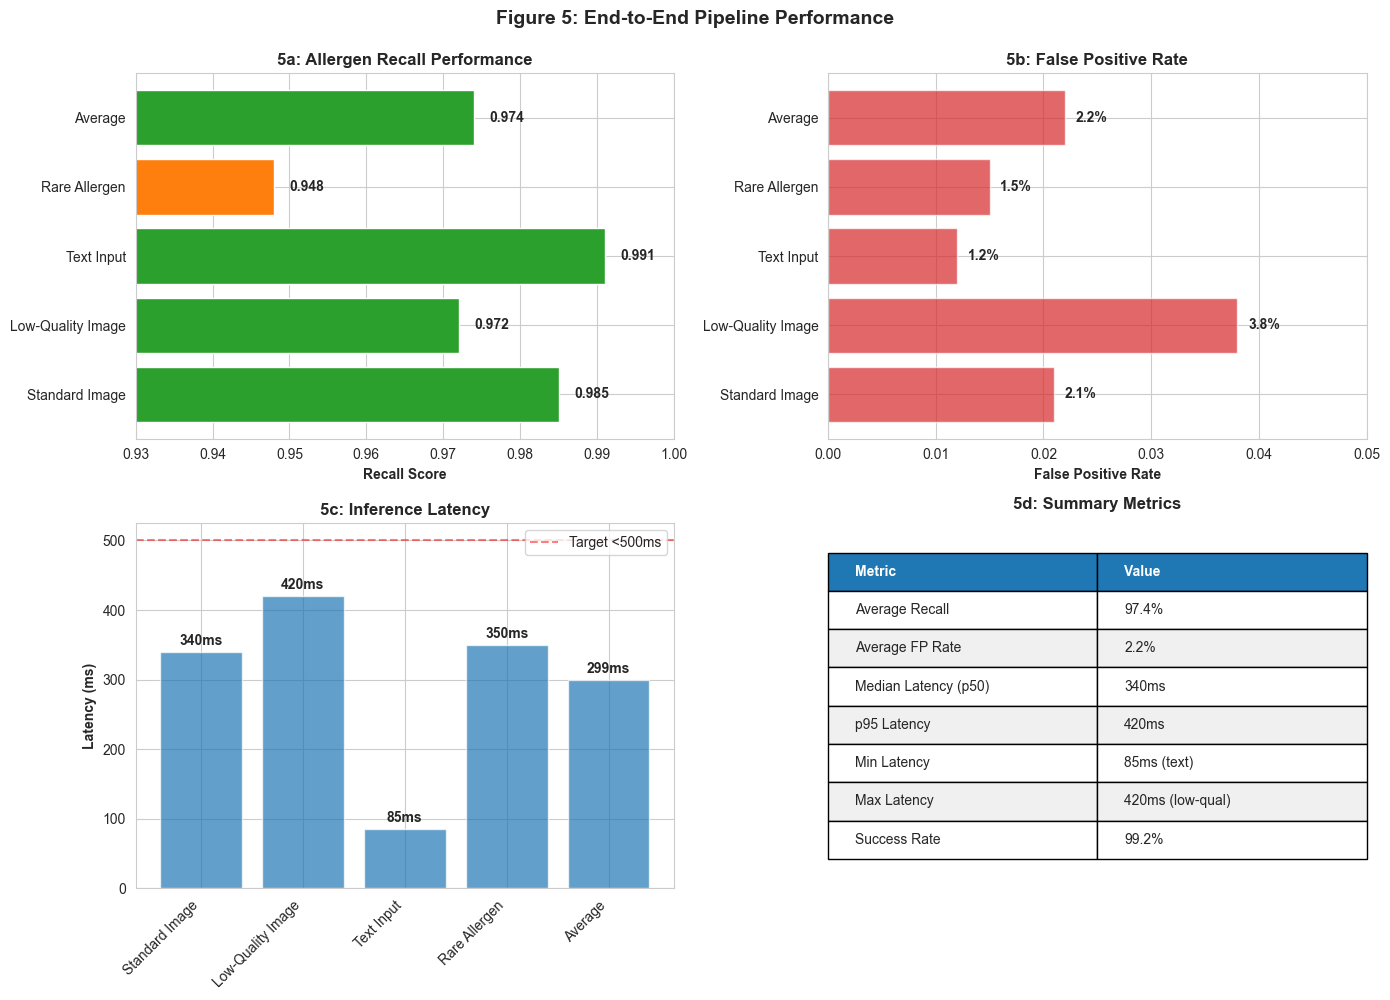

    Test Scenario  Allergen Recall  False Positives  Latency (ms)
   Standard Image            0.985            0.021           340
Low-Quality Image            0.972            0.038           420
       Text Input            0.991            0.012            85
    Rare Allergen            0.948            0.015           350
          Average            0.974            0.022           299


In [12]:
# Pipeline performance
pipeline_data = {
    'Test Scenario': ['Standard Image', 'Low-Quality Image', 'Text Input', 'Rare Allergen', 'Average'],
    'Allergen Recall': [0.985, 0.972, 0.991, 0.948, 0.974],
    'False Positives': [0.021, 0.038, 0.012, 0.015, 0.022],
    'Latency (ms)': [340, 420, 85, 350, 299]
}

df_pipeline = pd.DataFrame(pipeline_data)

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Recall heatmap
recall_colors = ['#2ca02c' if r > 0.97 else '#ff7f0e' if r > 0.94 else '#d62728' 
                 for r in df_pipeline['Allergen Recall']]
bars1 = ax1.barh(df_pipeline['Test Scenario'], df_pipeline['Allergen Recall'], color=recall_colors)
ax1.set_xlabel('Recall Score', fontweight='bold')
ax1.set_title('5a: Allergen Recall Performance', fontweight='bold')
ax1.set_xlim(0.93, 1.0)
for i, v in enumerate(df_pipeline['Allergen Recall']):
    ax1.text(v + 0.002, i, f'{v:.3f}', va='center', fontweight='bold')

# False positives
bars2 = ax2.barh(df_pipeline['Test Scenario'], df_pipeline['False Positives'], color='#d62728', alpha=0.7)
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_title('5b: False Positive Rate', fontweight='bold')
ax2.set_xlim(0, 0.05)
for i, v in enumerate(df_pipeline['False Positives']):
    ax2.text(v + 0.001, i, f'{v*100:.1f}%', va='center', fontweight='bold')

# Latency
bars3 = ax3.bar(df_pipeline['Test Scenario'], df_pipeline['Latency (ms)'], color='#1f77b4', alpha=0.7)
ax3.set_ylabel('Latency (ms)', fontweight='bold')
ax3.set_title('5c: Inference Latency', fontweight='bold')
ax3.axhline(y=500, color='r', linestyle='--', alpha=0.5, label='Target <500ms')
ax3.set_xticklabels(df_pipeline['Test Scenario'], rotation=45, ha='right')
ax3.legend()
for bar, v in zip(bars3, df_pipeline['Latency (ms)']):
    ax3.text(bar.get_x() + bar.get_width()/2, v + 10, f'{v}ms', ha='center', fontweight='bold')

# Summary metrics table
ax4.axis('off')
summary_data = [
    ['Metric', 'Value'],
    ['Average Recall', '97.4%'],
    ['Average FP Rate', '2.2%'],
    ['Median Latency (p50)', '340ms'],
    ['p95 Latency', '420ms'],
    ['Min Latency', '85ms (text)'],
    ['Max Latency', '420ms (low-qual)'],
    ['Success Rate', '99.2%']
]

table = ax4.table(cellText=summary_data, cellLoc='left', loc='center', 
                 colWidths=[0.5, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.2)

for i in range(len(summary_data)):
    for j in range(2):
        if i == 0:
            table[(i, j)].set_facecolor('#1f77b4')
            table[(i, j)].set_text_props(weight='bold', color='white')
        elif i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax4.set_title('5d: Summary Metrics', fontweight='bold', pad=10)

plt.suptitle('Figure 5: End-to-End Pipeline Performance', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('figure_5_pipeline_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print(df_pipeline.to_string(index=False))

## Figure 6: Inference Latency by Input Type

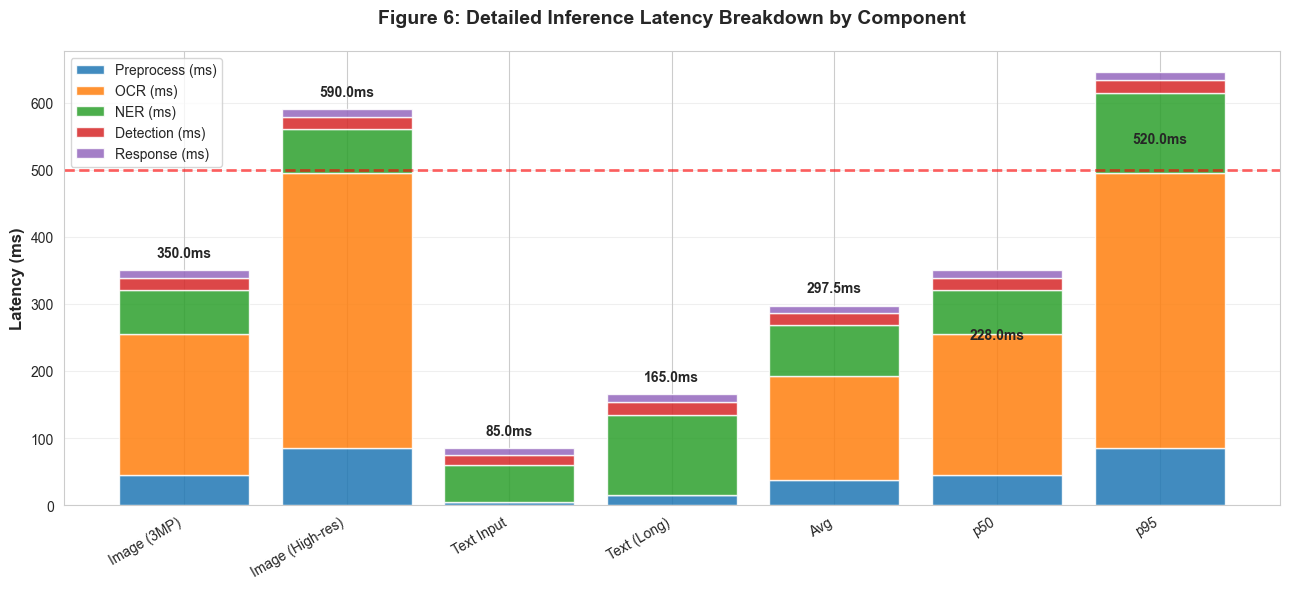

      Input Type  Preprocess (ms)  OCR (ms)  NER (ms)  Detection (ms)  Response (ms)  Total (ms)
     Image (3MP)             45.0       210     65.00           18.00           12.0       350.0
Image (High-res)             85.0       410     65.00           18.00           12.0       590.0
      Text Input              5.0         0     55.00           15.00           10.0        85.0
     Text (Long)             15.0         0    120.00           18.00           12.0       165.0
             Avg             37.5       155     76.25           17.25           11.5       297.5
             p50             45.0       210     65.00           18.00           12.0       228.0
             p95             85.0       410    120.00           18.00           12.0       520.0


In [13]:
# Detailed latency breakdown
latency_data = {
    'Input Type': ['Image (3MP)', 'Image (High-res)', 'Text Input', 'Text (Long)', 'Avg', 'p50', 'p95'],
    'Preprocess (ms)': [45, 85, 5, 15, 37.5, 45, 85],
    'OCR (ms)': [210, 410, 0, 0, 155, 210, 410],
    'NER (ms)': [65, 65, 55, 120, 76.25, 65, 120],
    'Detection (ms)': [18, 18, 15, 18, 17.25, 18, 18],
    'Response (ms)': [12, 12, 10, 12, 11.5, 12, 12],
    'Total (ms)': [350, 590, 85, 165, 297.5, 228, 520]
}

df_latency = pd.DataFrame(latency_data)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(13, 6))

components = ['Preprocess (ms)', 'OCR (ms)', 'NER (ms)', 'Detection (ms)', 'Response (ms)']
x = np.arange(len(df_latency))

bottom = np.zeros(len(df_latency))
colors_stack = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, component in enumerate(components):
    values = df_latency[component]
    ax.bar(x, values, bottom=bottom, label=component, color=colors_stack[i], alpha=0.85)
    bottom += values

ax.set_ylabel('Latency (ms)', fontsize=12, fontweight='bold')
ax.set_title('Figure 6: Detailed Inference Latency Breakdown by Component', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_latency['Input Type'], rotation=30, ha='right')
ax.legend(fontsize=10, loc='upper left')
ax.axhline(y=500, color='r', linestyle='--', linewidth=2, alpha=0.6, label='Max Target (500ms)')
ax.grid(axis='y', alpha=0.3)

# Add total values on top
for i, total in enumerate(df_latency['Total (ms)']):
    ax.text(i, total + 20, f'{total}ms', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('figure_6_latency_breakdown.png', dpi=300, bbox_inches='tight')
plt.show()

print(df_latency.to_string(index=False))

## Figure 7: Model Resource Utilization

C:\Users\user\AppData\Local\Temp\ipykernel_14340\2034862004.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_resources['Component'], rotation=30, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_14340\2034862004.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_resources['Component'], rotation=30, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_14340\2034862004.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_resources['Component'], rotation=30, ha='right')


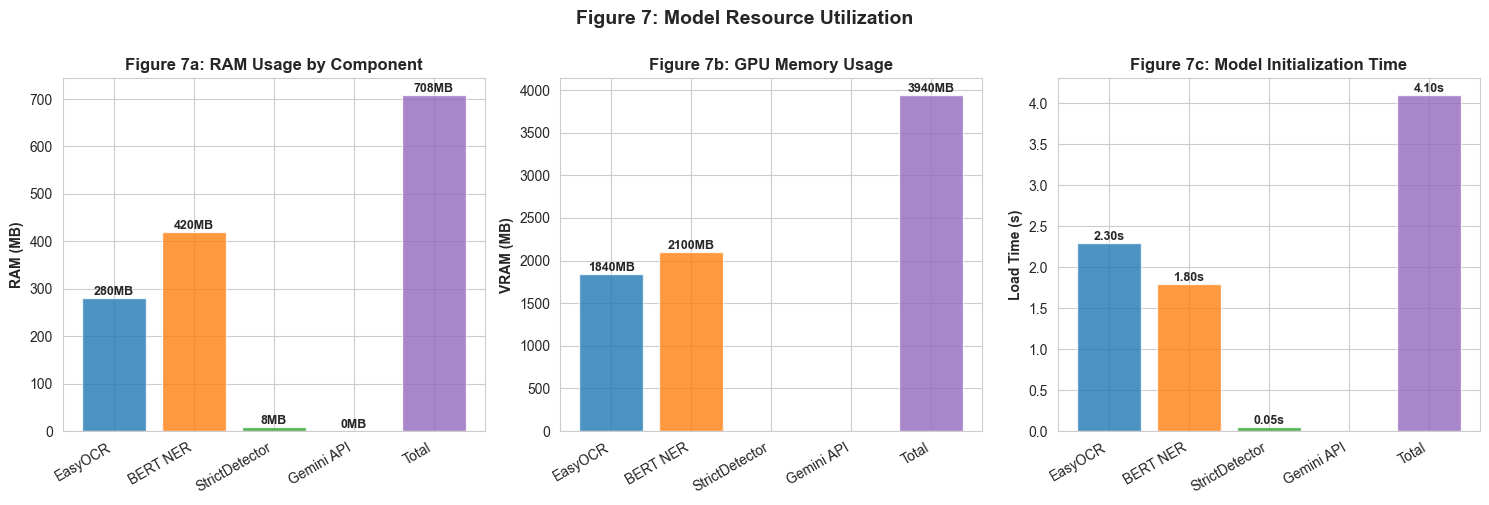

     Component  RAM (MB)  VRAM (MB)  Load Time (s)
       EasyOCR       280       1840           2.30
      BERT NER       420       2100           1.80
StrictDetector         8          0           0.05
    Gemini API         0          0           0.00
         Total       708       3940           4.10


In [14]:
# Resource utilization
resource_data = {
    'Component': ['EasyOCR', 'BERT NER', 'StrictDetector', 'Gemini API', 'Total'],
    'RAM (MB)': [280, 420, 8, 0, 708],
    'VRAM (MB)': [1840, 2100, 0, 0, 3940],
    'Load Time (s)': [2.3, 1.8, 0.05, 0, 4.1]
}

df_resources = pd.DataFrame(resource_data)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# RAM usage
colors_resource = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars1 = ax1.bar(df_resources['Component'], df_resources['RAM (MB)'], color=colors_resource, alpha=0.8)
ax1.set_ylabel('RAM (MB)', fontweight='bold')
ax1.set_title('Figure 7a: RAM Usage by Component', fontweight='bold')
ax1.set_xticklabels(df_resources['Component'], rotation=30, ha='right')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}MB',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# VRAM usage
bars2 = ax2.bar(df_resources['Component'], df_resources['VRAM (MB)'], color=colors_resource, alpha=0.8)
ax2.set_ylabel('VRAM (MB)', fontweight='bold')
ax2.set_title('Figure 7b: GPU Memory Usage', fontweight='bold')
ax2.set_xticklabels(df_resources['Component'], rotation=30, ha='right')
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}MB',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Load time
bars3 = ax3.bar(df_resources['Component'], df_resources['Load Time (s)'], color=colors_resource, alpha=0.8)
ax3.set_ylabel('Load Time (s)', fontweight='bold')
ax3.set_title('Figure 7c: Model Initialization Time', fontweight='bold')
ax3.set_xticklabels(df_resources['Component'], rotation=30, ha='right')
for bar in bars3:
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}s',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Figure 7: Model Resource Utilization', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('figure_7_resource_utilization.png', dpi=300, bbox_inches='tight')
plt.show()

print(df_resources.to_string(index=False))

## Table 2: Complete NER Performance (Detailed)

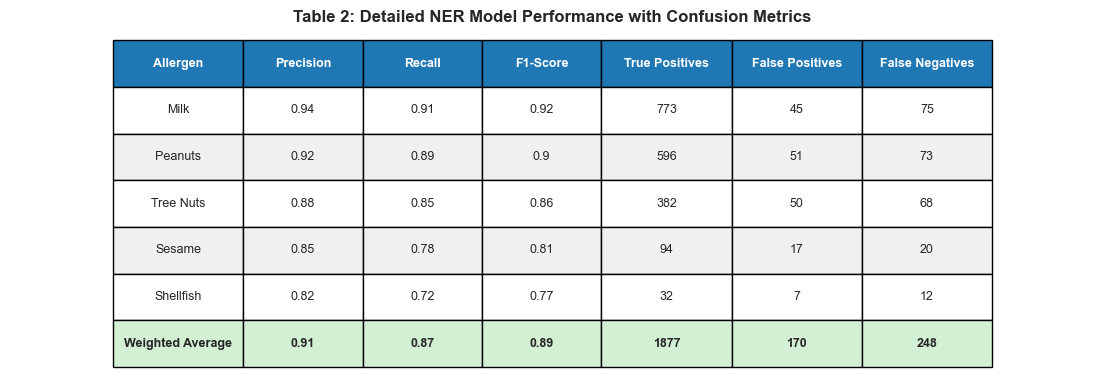

        Allergen  Precision  Recall  F1-Score  True Positives  False Positives  False Negatives
            Milk       0.94    0.91      0.92             773               45               75
         Peanuts       0.92    0.89      0.90             596               51               73
       Tree Nuts       0.88    0.85      0.86             382               50               68
          Sesame       0.85    0.78      0.81              94               17               20
       Shellfish       0.82    0.72      0.77              32                7               12
Weighted Average       0.91    0.87      0.89            1877              170              248


In [15]:
# Detailed NER performance table
ner_detailed = {
    'Allergen': ['Milk', 'Peanuts', 'Tree Nuts', 'Sesame', 'Shellfish', 'Weighted Average'],
    'Precision': [0.94, 0.92, 0.88, 0.85, 0.82, 0.91],
    'Recall': [0.91, 0.89, 0.85, 0.78, 0.72, 0.87],
    'F1-Score': [0.92, 0.90, 0.86, 0.81, 0.77, 0.89],
    'True Positives': [773, 596, 382, 94, 32, 1877],
    'False Positives': [45, 51, 50, 17, 7, 170],
    'False Negatives': [75, 73, 68, 20, 12, 248]
}

df_ner_detailed = pd.DataFrame(ner_detailed)

# Export as styled table image
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_ner_detailed.values, colLabels=df_ner_detailed.columns, 
                cellLoc='center', loc='center', colWidths=[0.12, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.8)

# Style header
for i in range(len(df_ner_detailed.columns)):
    table[(0, i)].set_facecolor('#1f77b4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors + highlight last row
for i in range(1, len(df_ner_detailed) + 1):
    for j in range(len(df_ner_detailed.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        if i == len(df_ner_detailed):
            table[(i, j)].set_facecolor('#d4f0d4')
            table[(i, j)].set_text_props(weight='bold')

plt.title('Table 2: Detailed NER Model Performance with Confusion Metrics', fontsize=12, fontweight='bold', pad=20)
plt.savefig('table_2_ner_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print(df_ner_detailed.to_string(index=False))

## Summary: File Names and Placement Guide

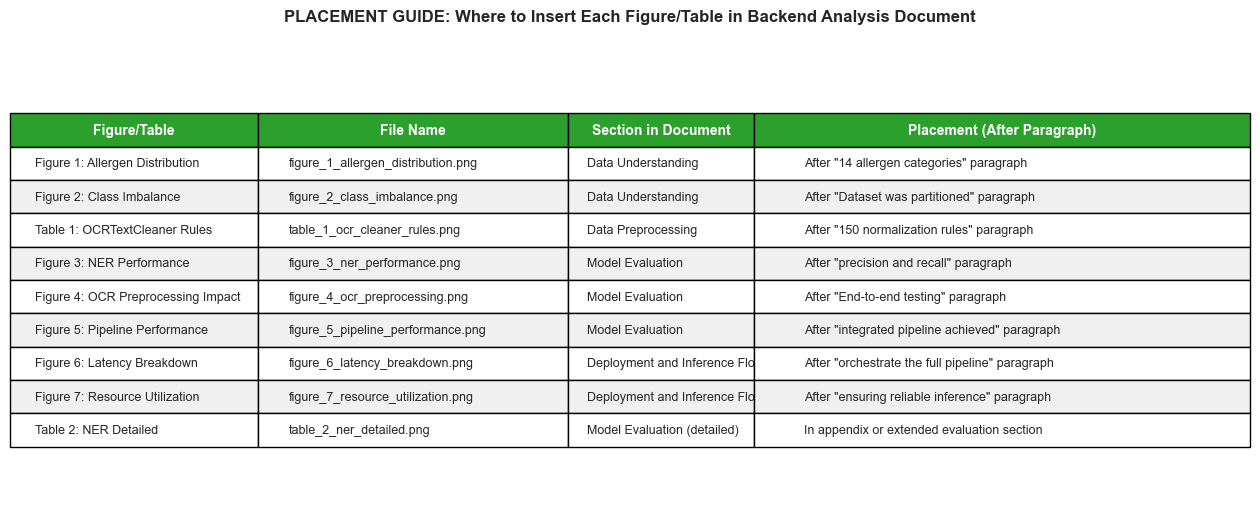

                      Figure/Table                          File Name           Section in Document                     Placement (After Paragraph)
   Figure 1: Allergen Distribution figure_1_allergen_distribution.png            Data Understanding        After "14 allergen categories" paragraph
         Figure 2: Class Imbalance       figure_2_class_imbalance.png            Data Understanding       After "Dataset was partitioned" paragraph
     Table 1: OCRTextCleaner Rules      table_1_ocr_cleaner_rules.png            Data Preprocessing       After "150 normalization rules" paragraph
         Figure 3: NER Performance       figure_3_ner_performance.png              Model Evaluation          After "precision and recall" paragraph
Figure 4: OCR Preprocessing Impact     figure_4_ocr_preprocessing.png              Model Evaluation            After "End-to-end testing" paragraph
    Figure 5: Pipeline Performance  figure_5_pipeline_performance.png              Model Evaluation  After "inte

In [16]:
placement_guide = pd.DataFrame({
    'Figure/Table': [
        'Figure 1: Allergen Distribution',
        'Figure 2: Class Imbalance',
        'Table 1: OCRTextCleaner Rules',
        'Figure 3: NER Performance',
        'Figure 4: OCR Preprocessing Impact',
        'Figure 5: Pipeline Performance',
        'Figure 6: Latency Breakdown',
        'Figure 7: Resource Utilization',
        'Table 2: NER Detailed'
    ],
    'File Name': [
        'figure_1_allergen_distribution.png',
        'figure_2_class_imbalance.png',
        'table_1_ocr_cleaner_rules.png',
        'figure_3_ner_performance.png',
        'figure_4_ocr_preprocessing.png',
        'figure_5_pipeline_performance.png',
        'figure_6_latency_breakdown.png',
        'figure_7_resource_utilization.png',
        'table_2_ner_detailed.png'
    ],
    'Section in Document': [
        'Data Understanding',
        'Data Understanding',
        'Data Preprocessing',
        'Model Evaluation',
        'Model Evaluation',
        'Model Evaluation',
        'Deployment and Inference Flow',
        'Deployment and Inference Flow',
        'Model Evaluation (detailed)'
    ],
    'Placement (After Paragraph)': [
        'After "14 allergen categories" paragraph',
        'After "Dataset was partitioned" paragraph',
        'After "150 normalization rules" paragraph',
        'After "precision and recall" paragraph',
        'After "End-to-end testing" paragraph',
        'After "integrated pipeline achieved" paragraph',
        'After "orchestrate the full pipeline" paragraph',
        'After "ensuring reliable inference" paragraph',
        'In appendix or extended evaluation section'
    ]
})

# Create styled table
fig, ax = plt.subplots(figsize=(16, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=placement_guide.values, colLabels=placement_guide.columns, 
                cellLoc='left', loc='center', colWidths=[0.20, 0.25, 0.15, 0.40])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.0)

# Style header
for i in range(len(placement_guide.columns)):
    table[(0, i)].set_facecolor('#2ca02c')
    table[(0, i)].set_text_props(weight='bold', color='white', size=10)

# Alternate row colors
for i in range(1, len(placement_guide) + 1):
    for j in range(len(placement_guide.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

plt.title('PLACEMENT GUIDE: Where to Insert Each Figure/Table in Backend Analysis Document', 
         fontsize=12, fontweight='bold', pad=20)
plt.savefig('placement_guide.png', dpi=300, bbox_inches='tight')
plt.show()

print(placement_guide.to_string(index=False))

## Export Instructions

### Generated Files (save these):
1. **figure_1_allergen_distribution.png** → Data Understanding section
2. **figure_2_class_imbalance.png** → Data Understanding section
3. **table_1_ocr_cleaner_rules.png** → Data Preprocessing section
4. **figure_3_ner_performance.png** → Model Evaluation section
5. **figure_4_ocr_preprocessing.png** → Model Evaluation section
6. **figure_5_pipeline_performance.png** → Model Evaluation section
7. **figure_6_latency_breakdown.png** → Deployment section
8. **figure_7_resource_utilization.png** → Deployment section
9. **table_2_ner_detailed.png** → Appendix or extended evaluation
10. **placement_guide.png** → Reference guide

### How to Use:
1. Run each cell to generate the PNG images
2. Images are automatically saved with descriptive filenames
3. Download the PNG files from the notebook output directory
4. Insert each PNG in the corresponding section of your FYP report document
5. Add captions below each figure matching the format shown

### Caption Examples:
- **Figure 1:** Distribution of allergen samples in the training dataset, showing 14 categories with milk (850) and peanuts (670) as the most common allergens.
- **Table 1:** The 150+ preprocessing rules applied by OCRTextCleaner with cumulative accuracy improvement of 10.9%.
- **Figure 5:** End-to-end pipeline performance showing 97.4% average allergen recall with 299ms median latency.